In [6]:
import numpy as np
from scipy.stats import multivariate_normal

In [16]:
def e_step(X, means, covariance, density):
  likelihood = np.zeros((10, 2))
  resp = np.zeros((10, 2))

  for i in range(2):
    likelihood[:, i] = multivariate_normal.pdf(X, means[i], covariance[i], allow_singular=True)
    resp[:, i] = density[i] * likelihood[:, i]
  
  log_likelihood = np.sum(np.log(np.sum(resp, axis=1)))
  resp = resp / resp.sum(axis=1, keepdims=1)

  return resp, log_likelihood

In [28]:
def m_step(X, means, covariance, resp):
  for i in range(2):
    weight = resp[:, [i]]
    total_weight = weight.sum()
    means[i] = (X * weight).sum(axis=0) / total_weight
    covariance[i] = np.cov(X.T, aweights=((weight/total_weight).flatten()), bias=True)
  density = resp.mean(axis=0)
  return means, covariance, density

In [30]:
X = [
     [3, 8],
     [3, 6],
     [3, 4],
     [4, 7],
     [4, 5],
     [5, 5],
     [5, 1],
     [7, 4],
     [7, 3],
     [8, 5]
]
X = np.array(X)

In [31]:
means = np.array([[4, 6], [6.5, 3]])
covariance = np.array([[[0.675, 0.9], [0.9, 1.3]],
                       [[0.675, 0.825], [0.825, 1.3]]])
density = np.array([6/10, 4/10])
iterations = 3

for i in range(iterations):
  resp, log_likelihood = e_step(X, means, covariance, density)
  print(f'ITERATION [{i+1}]')
  print('\nLog Likelihood:')
  print(log_likelihood)
  print('\nResponsibility:')
  print(resp)

  means, covariance, density = m_step(X, means, covariance, resp)
  print('\nUpdated Means:')
  print(means)
  print('\nUpdated Covariances:')
  print(covariance)
  print('-------------------------------------------------')

ITERATION [1]

Log Likelihood:
-124.54277717502774

Responsibility:
[[1.00000000e+000 1.03503365e-044]
 [1.00000000e+000 2.50761390e-040]
 [1.00000000e+000 1.58236815e-024]
 [1.00000000e+000 4.90028689e-038]
 [1.00000000e+000 5.29398675e-020]
 [4.58809987e-001 5.41190013e-001]
 [5.38479005e-087 1.00000000e+000]
 [3.41390270e-081 1.00000000e+000]
 [2.94818908e-109 1.00000000e+000]
 [8.04775102e-092 1.00000000e+000]]

Updated Means:
[[3.53447912 5.91595055]
 [6.54144618 3.45855382]]

Updated Covariances:
[[[ 0.41691009 -0.12317623]
  [-0.12317623  1.90888624]]

 [[ 1.36745583  1.05481674]
  [ 1.05481674  2.24828221]]]
-------------------------------------------------
ITERATION [2]

Log Likelihood:
-35.113967094485204

Responsibility:
[[1.00000000e+00 1.99721783e-10]
 [9.99999533e-01 4.66568390e-07]
 [9.99432453e-01 5.67546958e-04]
 [9.99997497e-01 2.50313933e-06]
 [9.98950777e-01 1.04922315e-03]
 [8.13648094e-01 1.86351906e-01]
 [2.82370098e-03 9.97176299e-01]
 [9.35734171e-07 9.99999064

In [34]:
labels = []

for i in range(len(resp)):
  if(resp[i][0] >= resp[i][1]):
    labels.append(0)
  else:
    labels.append(1)

labels

[0, 0, 0, 0, 0, 0, 1, 1, 1, 1]

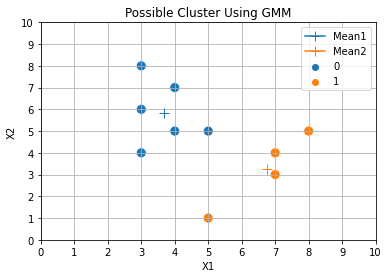

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.DataFrame({
    'X1': X[:, 0],
    'X2': X[:, 1],
    'Class': labels
})

plt.grid()
sns.scatterplot(x='X1', y='X2', hue='Class', data=df, s=100)
plt.plot(means[0][0], means[0][1], marker='+', markersize=10, label='Mean1')
plt.plot(means[1][0], means[1][1], marker='+', markersize=10, label='Mean2')
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.legend()
plt.xticks(np.arange(0, 11))
plt.yticks(np.arange(0, 11))
plt.title("Possible Cluster Using GMM")
plt.show()